In [1]:
import pandas as pd

In [2]:
# Load the JSON file into a pandas DataFrame
df = pd.read_json('C:\\Users\\momin\\Desktop\\Product_Review_Authentication\\Sentiment-Analysis-Product-Reviews\\Electronics_5.json', lines=True)

df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [3]:
df.shape

(1689188, 9)

In [4]:
df = df.sample(n=100000, random_state=42)

In [5]:
df.shape

(100000, 9)

In [6]:
df.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
981956,A3E3VF85DAW0FU,B004M8S12A,RedRover,"[57, 67]","Well, after trying out some Box Towers....that...",5,Best in Class,1307404800,"06 7, 2011"
615465,A15X0XCY1EKJHL,B002KANXBG,"James Stitley ""Jim Stitley""","[16, 16]",I ordered one for my wife and one for me. Afte...,5,S 70 Review,1261612800,"12 24, 2009"
1060045,A393R1LK2A468F,B0050I1PHO,nelson 8A,"[3, 7]",muy buen producto... a full en juegos fHD.... ...,5,nice,1314576000,"08 29, 2011"


In [7]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [8]:
df.to_csv("Dataset.csv")

In [9]:
import pandas as pd

df= pd.read_csv("Dataset.csv")

In [10]:
df.head(3)

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,981956,A3E3VF85DAW0FU,B004M8S12A,RedRover,"[57, 67]","Well, after trying out some Box Towers....that...",5,Best in Class,1307404800,"06 7, 2011"
1,615465,A15X0XCY1EKJHL,B002KANXBG,"James Stitley ""Jim Stitley""","[16, 16]",I ordered one for my wife and one for me. Afte...,5,S 70 Review,1261612800,"12 24, 2009"
2,1060045,A393R1LK2A468F,B0050I1PHO,nelson 8A,"[3, 7]",muy buen producto... a full en juegos fHD.... ...,5,nice,1314576000,"08 29, 2011"


# Assigning labels to each sample

In [11]:
import pandas as pd
import joblib
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Load the saved Naive Bayes model and CountVectorizer
naive_bayes_model = joblib.load('naive_bayes_model.pkl')
count_vectorizer = joblib.load('count_vectorizer.pkl')

df['overall'].fillna('', inplace=True)
df['reviewText'].fillna('', inplace=True)

# Preprocess text data
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Combine features
df['features'] = df['overall'].astype(str) + ' ' + df['reviewText']

# Preprocess the combined features
df['preprocessed_features'] = df['features'].apply(preprocess_text)

# Vectorize the text data
X_vectorized = count_vectorizer.transform(df['preprocessed_features'])

# Predict labels for the new dataset
predicted_labels = naive_bayes_model.predict(X_vectorized)

# Assign the predicted labels to the new dataset
df['ReviewType'] = predicted_labels

In [12]:
df.head(3)

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,features,preprocessed_features,ReviewType
0,981956,A3E3VF85DAW0FU,B004M8S12A,RedRover,"[57, 67]","Well, after trying out some Box Towers....that...",5,Best in Class,1307404800,"06 7, 2011","5 Well, after trying out some Box Towers....th...",5 well tri box tower .... sound like music box...,OR
1,615465,A15X0XCY1EKJHL,B002KANXBG,"James Stitley ""Jim Stitley""","[16, 16]",I ordered one for my wife and one for me. Afte...,5,S 70 Review,1261612800,"12 24, 2009",5 I ordered one for my wife and one for me. Af...,5 order one wife one read neg review pictur qu...,OR
2,1060045,A393R1LK2A468F,B0050I1PHO,nelson 8A,"[3, 7]",muy buen producto... a full en juegos fHD.... ...,5,nice,1314576000,"08 29, 2011",5 muy buen producto... a full en juegos fHD......,5 muy buen producto ... full en juego fhd .......,CG


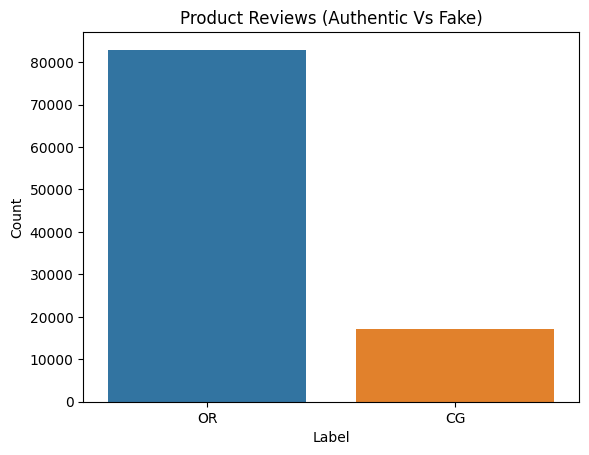

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to visualize the distribution of samples in each category
sns.countplot(x='ReviewType', data=df)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Product Reviews (Authentic Vs Fake)')

plt.show()

### class counts

In [14]:
print(df['ReviewType'].value_counts())

OR    82915
CG    17085
Name: ReviewType, dtype: int64


In [15]:
df.columns

Index(['Unnamed: 0', 'reviewerID', 'asin', 'reviewerName', 'helpful',
       'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime',
       'features', 'preprocessed_features', 'ReviewType'],
      dtype='object')

## Saving Labelled Data

In [16]:
df.to_csv("Dataset_Labelled.csv")

## Final model to classify product review as Authentic or Fake

In [17]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Naive Bayes Model for Original Data

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Load the original dataset with labels
original_data = pd.read_csv("Dataset_Labelled.csv")

# Drop rows with missing or NaN values
original_data.dropna(inplace=True)

# Convert "helpful" column to string type
# original_data['helpful'] = original_data['helpful'].astype(str)

# Convert "overall" column to string type
original_data['overall'] = original_data['overall'].astype(str)

# Convert "summary" column to string type
original_data['summary'] = original_data['summary'].astype(str)

# Preprocess text data


# Preprocess the text columns
original_data['reviewText'] = original_data['reviewText'].apply(preprocess_text)
original_data['summary'] = original_data['summary'].apply(preprocess_text)

# Combine features
original_data['features'] = original_data['reviewText'] + ' ' + original_data['overall'] + ' ' + original_data['summary']

# Split the dataset into features (X) and labels (y)
X = original_data['features']
y = original_data['ReviewType']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vectorized, y_train)

# Evaluate the model
y_pred = naive_bayes_classifier.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8876980902072328
Classification Report:
               precision    recall  f1-score   support

          CG       0.69      0.62      0.66      3374
          OR       0.92      0.94      0.93     16314

    accuracy                           0.89     19688
   macro avg       0.81      0.78      0.79     19688
weighted avg       0.88      0.89      0.89     19688



<Figure size 1000x800 with 0 Axes>

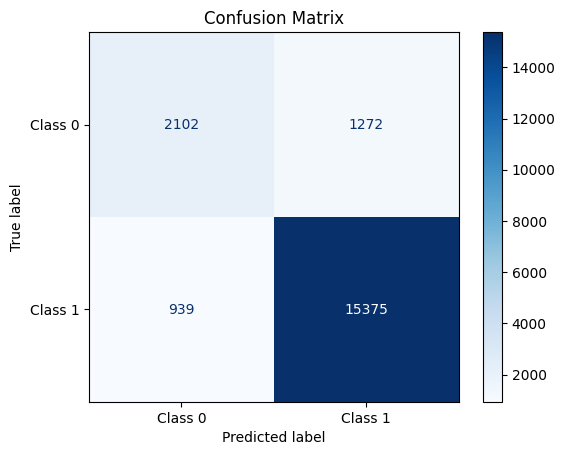

Model Accuracy:  0.8876980902072328


In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='.0f')  # values_format='.0f' to display integer values
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
print("Model Accuracy: ", accuracy)

In [20]:
import joblib

# Save the trained model
joblib.dump(naive_bayes_classifier, 'Final_Naive_Bayes.pkl')

joblib.dump(vectorizer, 'Final_Count_Vectorizer.pkl')


['Final_Count_Vectorizer.pkl']

# testing

In [21]:
# Preprocess the test samples
test_samples = [
    {'overall': '5', 'Summary': ' Cute but functional', 'reviewText': 'It is a decent battery pack, I have charged and discharged it several times while testing it and it states 10,000 mAh and I got pretty close to that, averaging 9750 mAh in my tests. And I am not sure if that display is a paw or the Grateful dead bear. But each section indicated 20% power. Now the light on it is well lets just say it"s not something you would want to have to use long term, it"s not really bright but it will do in a pinch. They charging port is a USB-C so that was a little different as to all my other battery banks use the older USB-Micro charging cable. Not a big deal I just had to go back into the house and get the correct cable. Now they did provide a USB-C cable in the box I just forgot to bring it outside with me. So I charged this using a small 21 watt solar panel and it took the better part of a full day to charge but again that was expected, I didn"t move the panel to catch the sun at all, just left it outside while I was at work, and unlike some other power banks that if a cloud passes you have to unplug the cord to get it to charge again this was able to accept the fluctuation in power and adapt to it and it started to recharge about 30 seconds after the cloud passed so I don"t have to be there to babysit it. That is a huge thing for me as to I charge most of my power banks from solar when I am off grid and if I am away from the campsite and a cloud goes by I don"t want the power bank to sit there till I get back and not charge. Now I tested this with my backpack, I took a short hike and the solar panel was hanging on the back of my pack so it was in and out of the sun. it did charge so that is a plus as well. So yes I would buy this again and I plan on looking to see if they have a larger capacity one'},
    {'overall': '5', 'Summary': 'Excellent charger (so good this is my 3rd)', 'reviewText': "This is my 3rd INIU power bank because after getting my 1st, I bought one for my son but it was recently stolen. Therefore, I bought myself a new one (my 3rd) at a great price for an upcoming trip so he can have my older one. My original power bank worked great and provided multiple charges for my phone and other small devices and its own battery would recharge relatively quickly. I’ve also used it to charge my computer at times and it works great! After over 2-2.5 years of regular use, I’ve noticed that it takes longer to fully charge up and does provide as many charges but again that’s after 2+ years of regular use. The USB-As are becoming obsolete but I still have plenty of cords so their still useful. It’s also got a paw print that lights up to let you know the battery level and an LED light that’s useful at times. I just shove a couple of cords in the bag with the charger and I’m ready to go. Basically, this was a great purchase and when it was stolen, I didn’t have to think about whether to replace it with the same thing."}
]

# Convert the test samples to DataFrame
test_df = pd.DataFrame(test_samples)

# Convert columns to string type
test_df['overall'] = test_df['overall'].astype(str)
test_df['Summary'] = test_df['Summary'].astype(str)
test_df['reviewText'] = test_df['reviewText'].astype(str)

# Preprocess text data
test_df['reviewText'] = test_df['reviewText'].apply(preprocess_text)
test_df['Summary'] = test_df['Summary'].apply(preprocess_text)

# Combine features
test_df['features'] = test_df['reviewText'] + ' ' + test_df['overall'] + ' ' + test_df['Summary']

# Vectorize the test data
X_test = vectorizer.transform(test_df['features'])

# Make predictions
predicted_labels = naive_bayes_classifier.predict(X_test)

# Display the test samples with predicted labels
test_df['predicted_label'] = predicted_labels
test_df[['overall', 'Summary', 'reviewText', 'predicted_label']]


,overall,Summary,reviewText,predicted_label
0,5,cute function,decent batteri pack charg discharg sever time ...,OR
1,5,excel charger good 3rd,3rd iniu power bank get 1st bought one son rec...,OR
